In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('UK_Accident.csv')
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002849,2005
1,1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002909,2005
2,2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002857,2005
3,3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,NaN,NaN,1,Yes,E01002840,2005
4,4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,NaN,NaN,1,Yes,E01002863,2005


In [6]:
print("1.Understanding Data Structure")
print(df.info()) # To know basic informations about dataset.
print(df.describe()) 
# Statistic Summary
print("\nSummary Statastics for categorical features\n")
print(df.describe(include=['O']))
# To know the missing value
print("Data Cleaning")
print(df.isnull().sum())
# To drop Null values
df=df.dropna()

1.Understanding Data Structure
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1504150 entries, 0 to 1504149
Data columns (total 33 columns):
 #   Column                                       Non-Null Count    Dtype  
---  ------                                       --------------    -----  
 0   Unnamed: 0                                   1504150 non-null  int64  
 1   Accident_Index                               1504150 non-null  object 
 2   Location_Easting_OSGR                        1504049 non-null  float64
 3   Location_Northing_OSGR                       1504150 non-null  float64
 4   Longitude                                    1504049 non-null  float64
 5   Latitude                                     1504150 non-null  float64
 6   Police_Force                                 1504150 non-null  int64  
 7   Accident_Severity                            1504150 non-null  int64  
 8   Number_of_Vehicles                           1504150 non-null  int64  
 9   Number_of_Casua

# Univariate Analysis

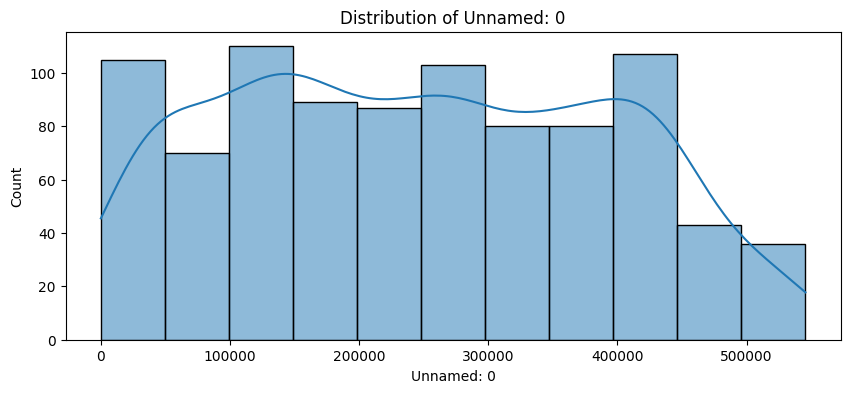

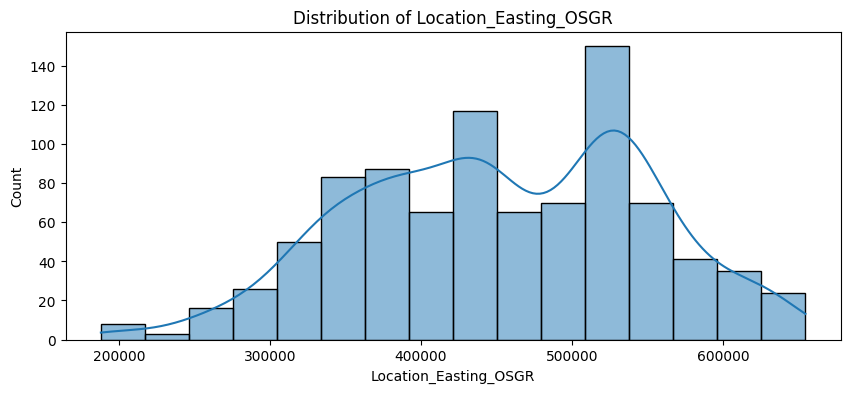

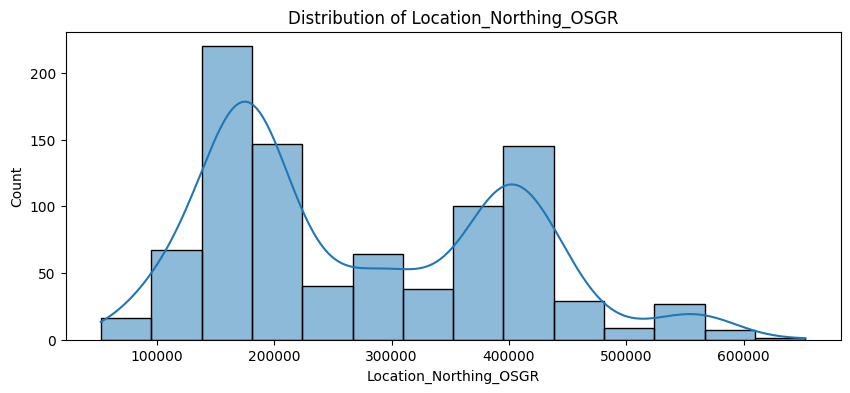

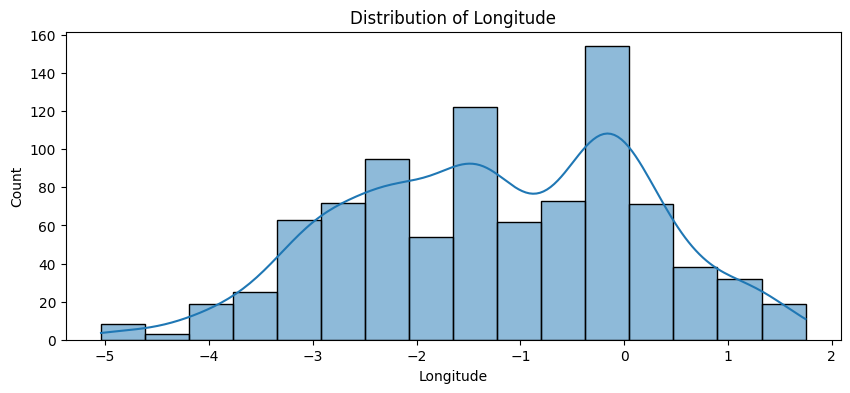

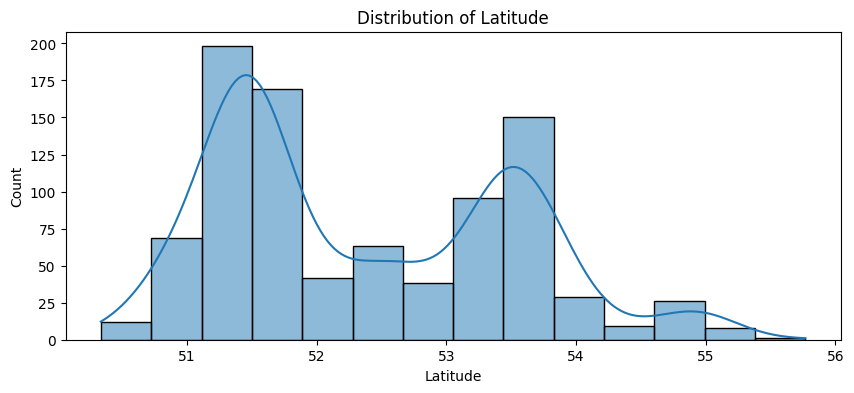

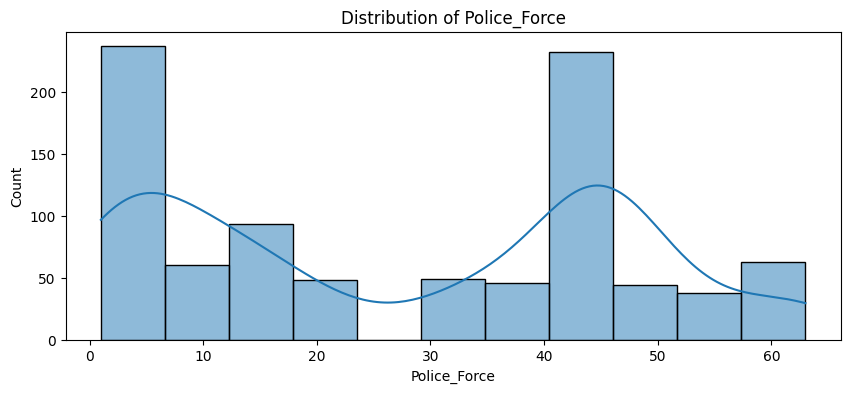

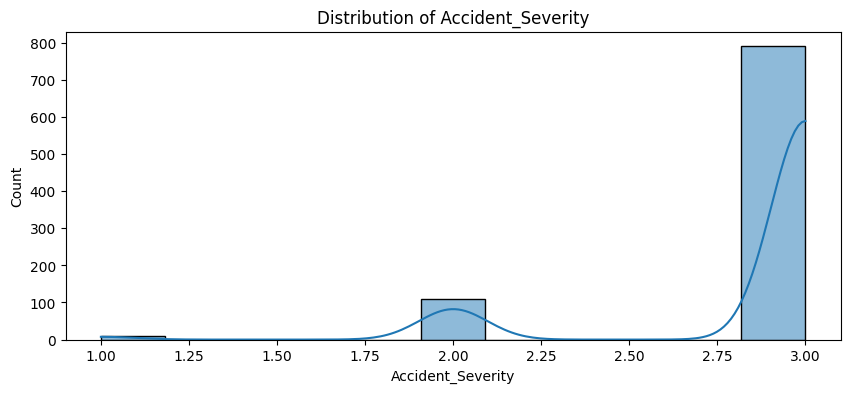

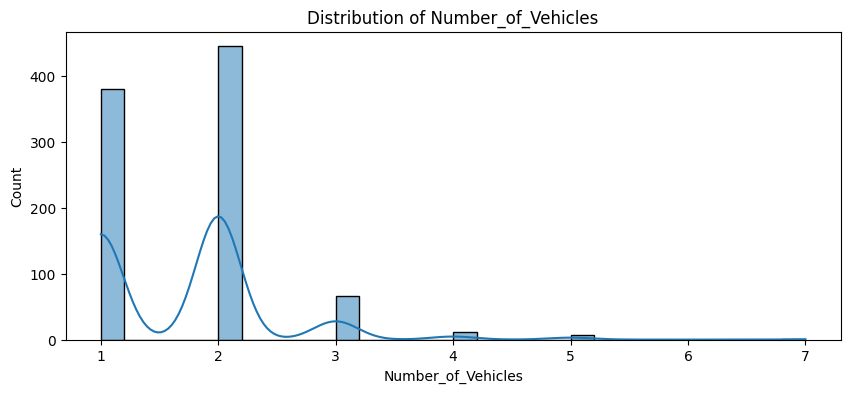

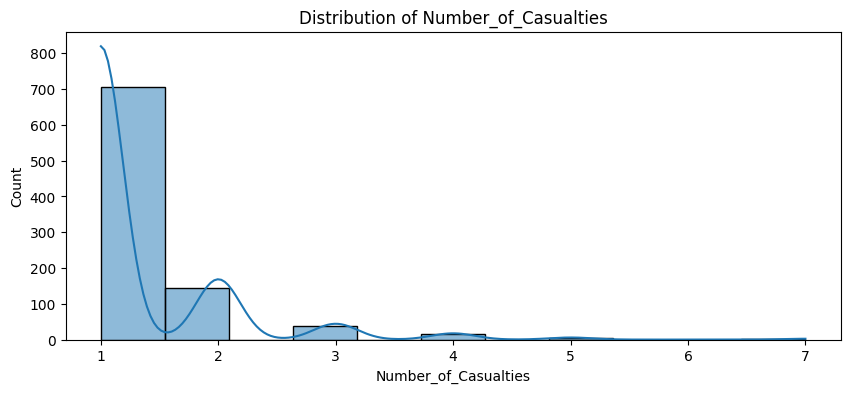

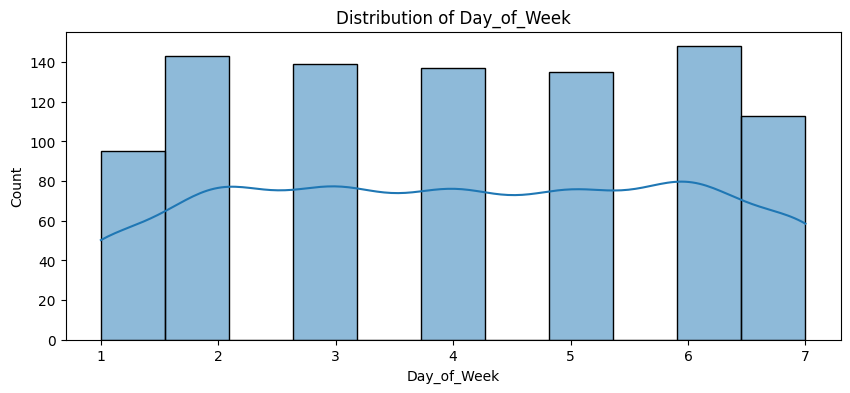

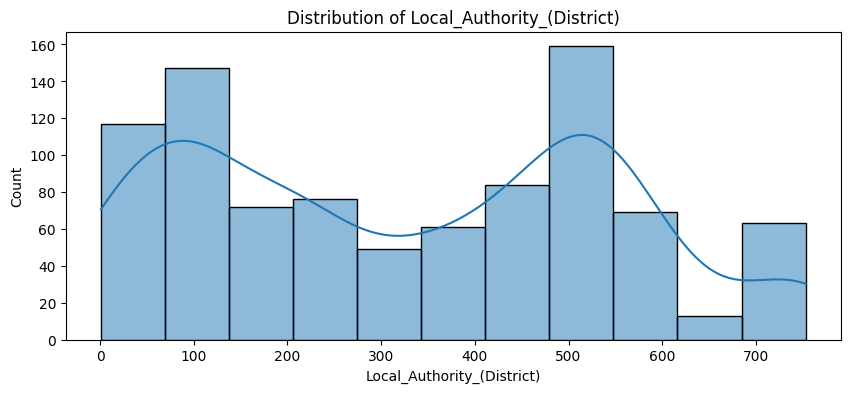

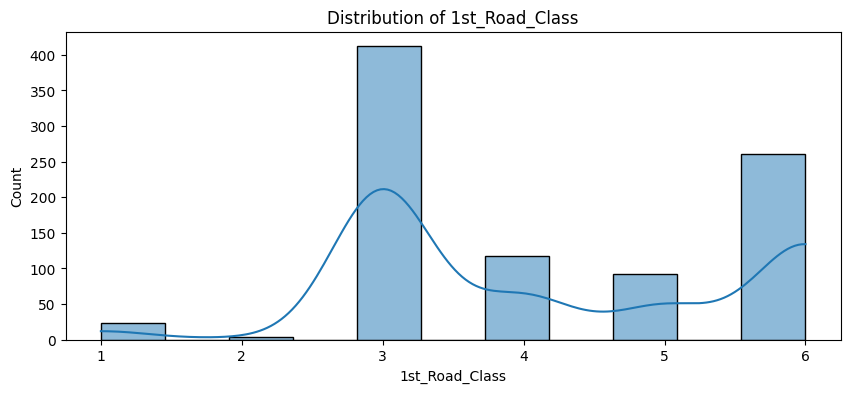

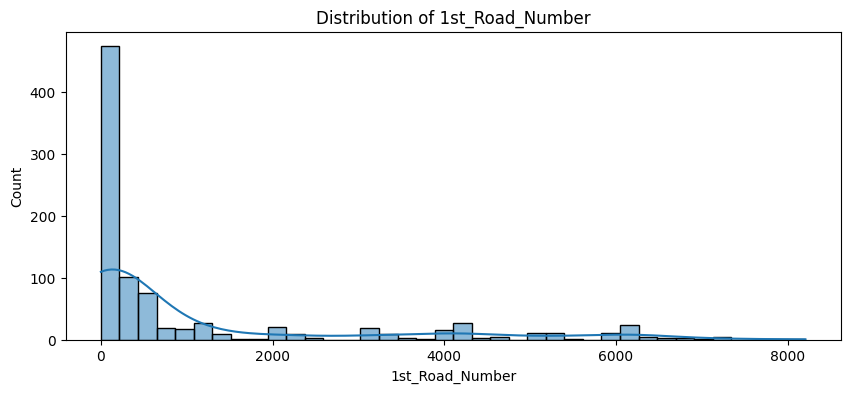

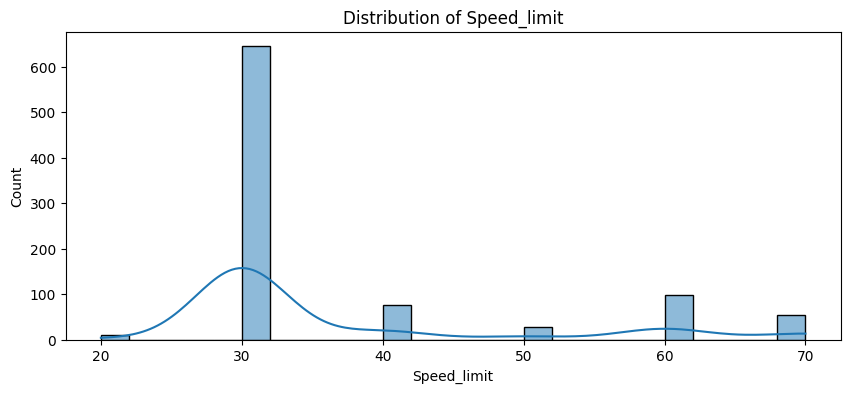

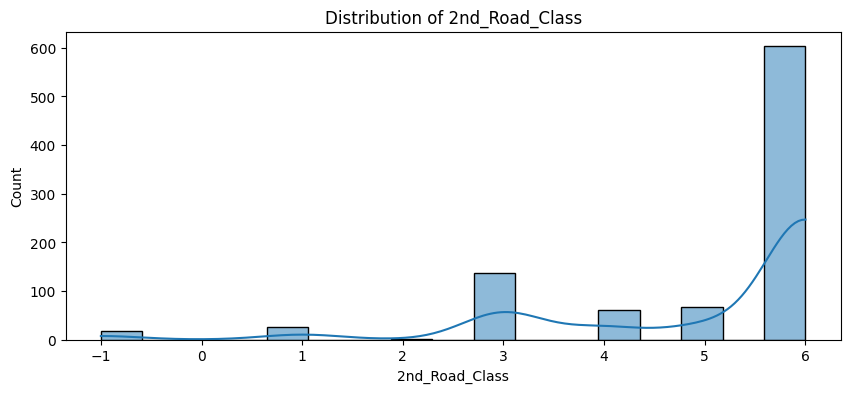

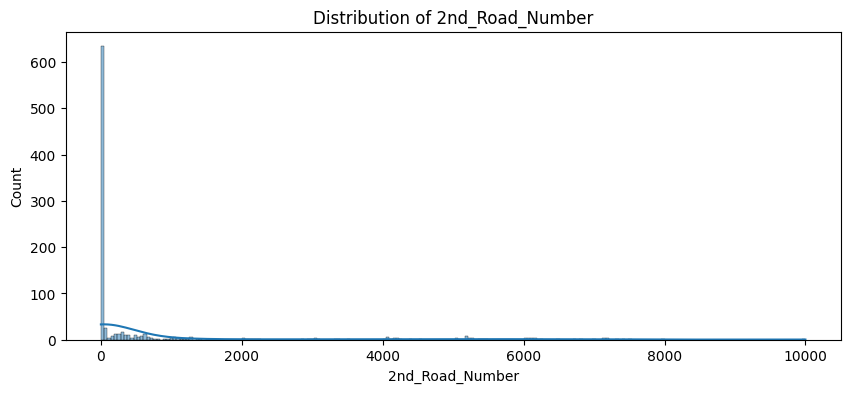

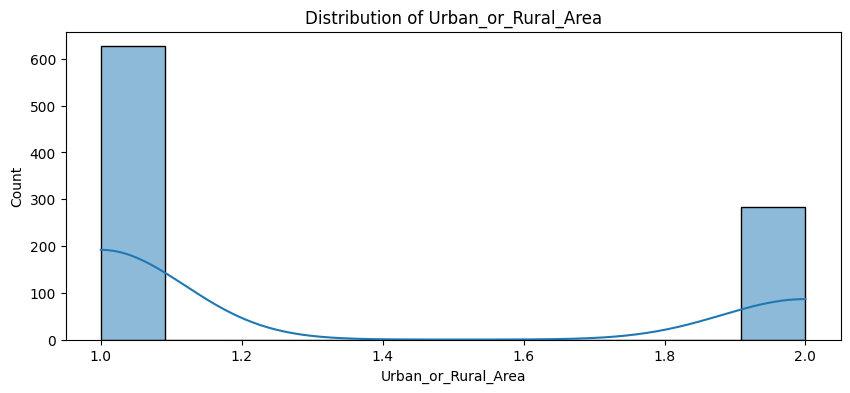

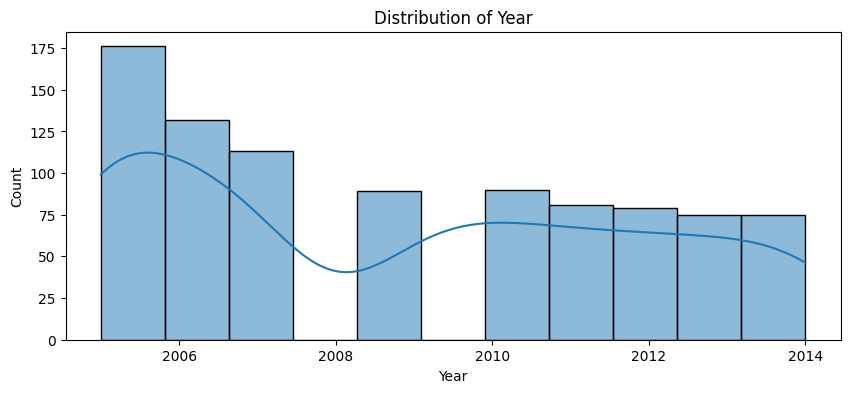

In [7]:
# 4. Univariate Analysis
# Distribution of numerical features
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Distribution of Categorical Feautures

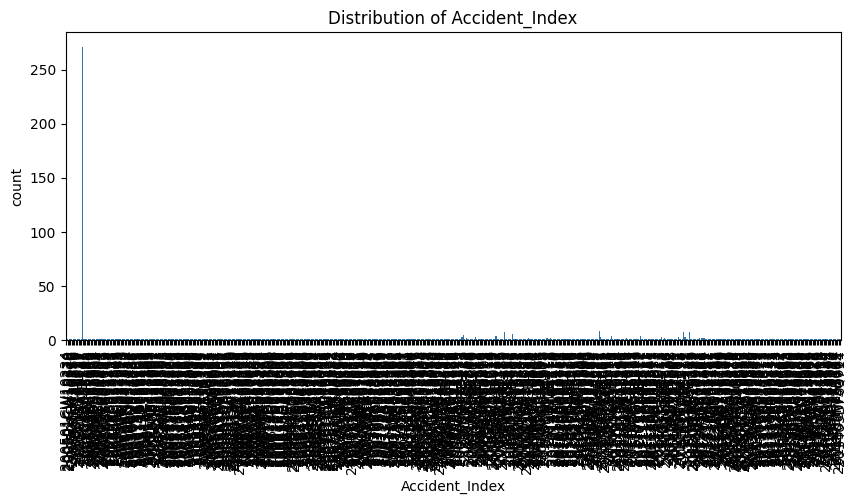

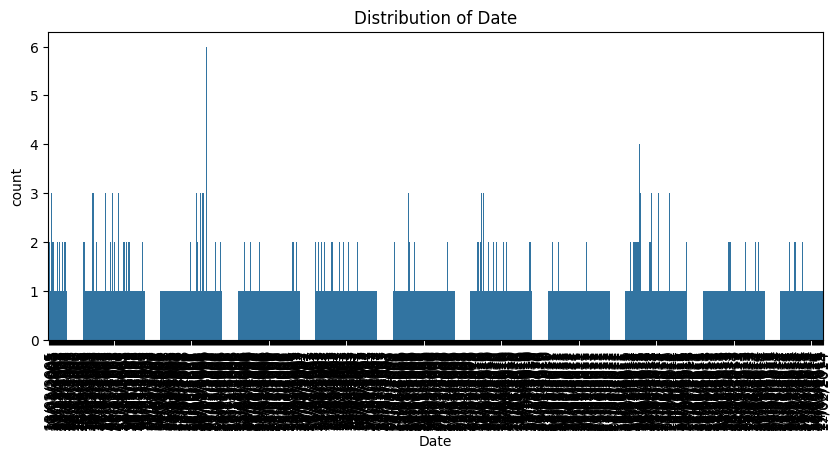

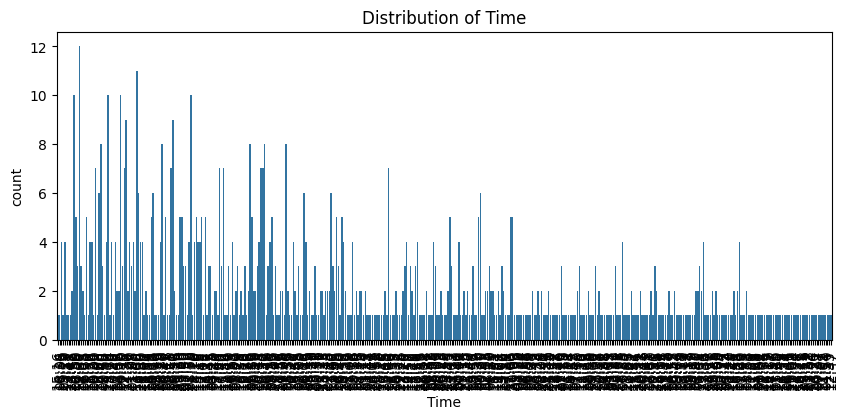

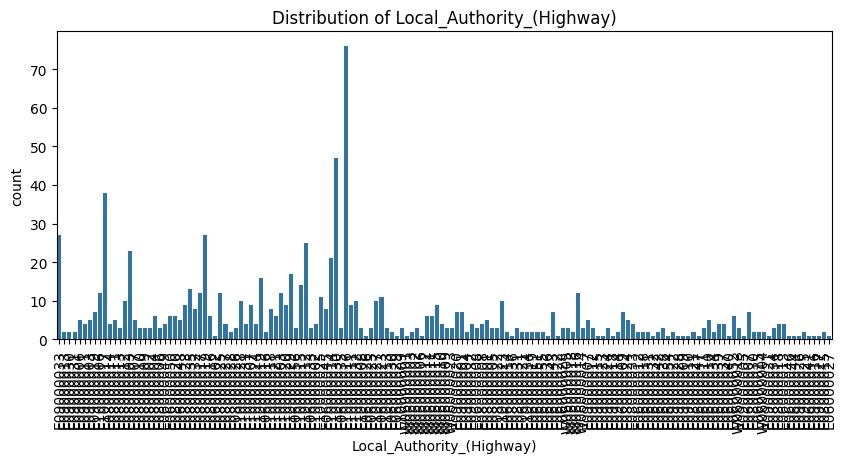

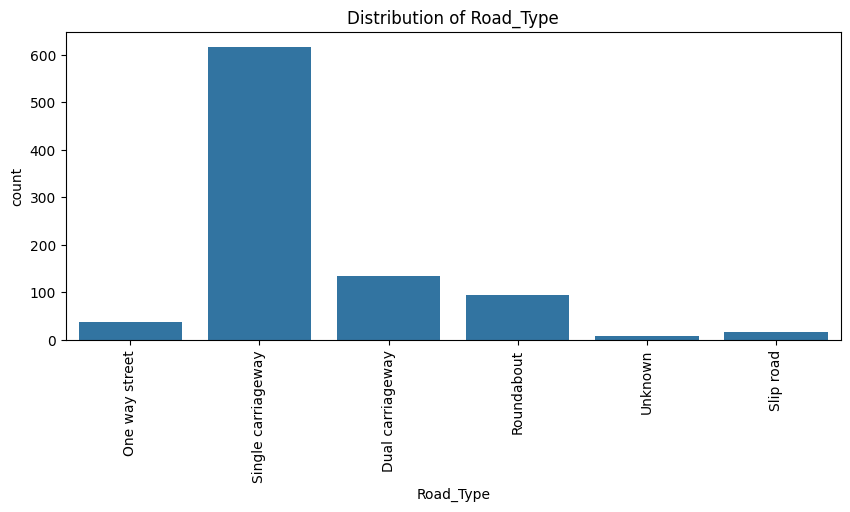

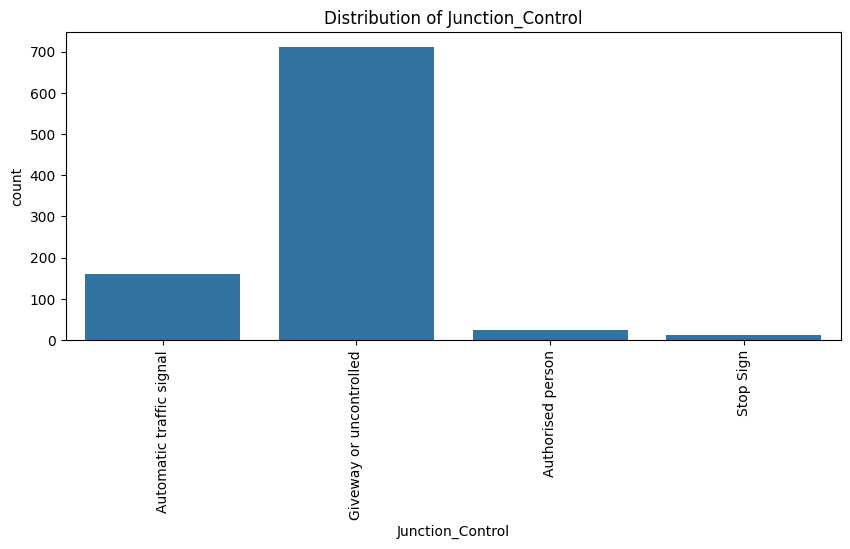

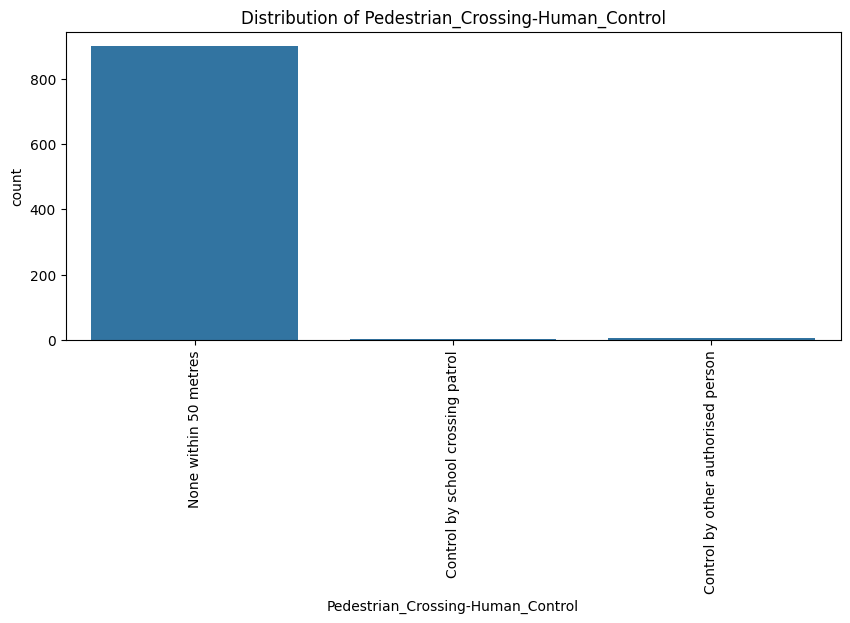

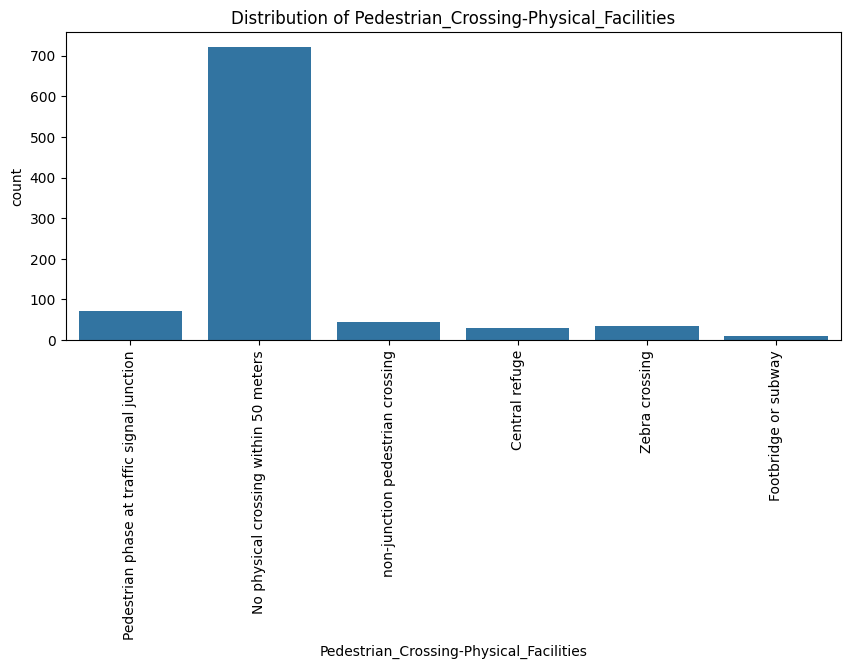

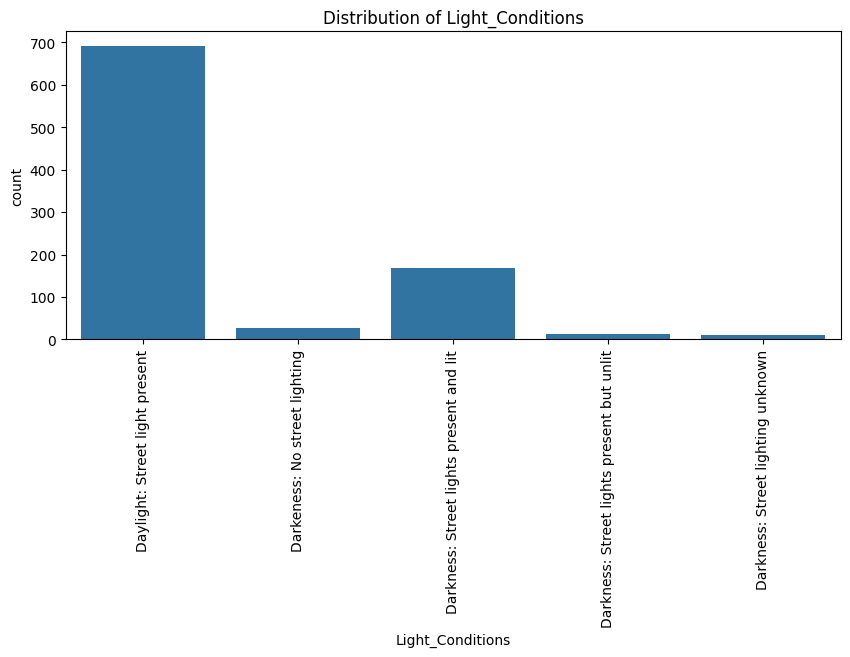

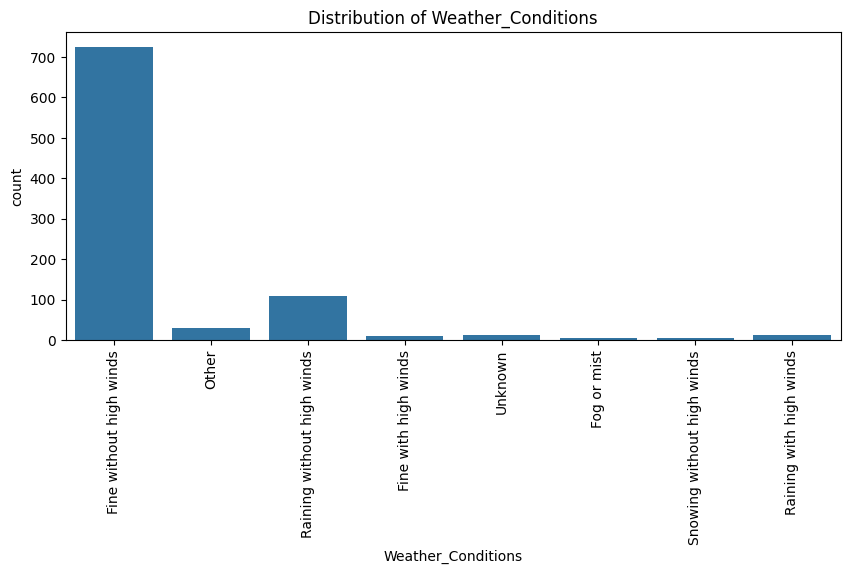

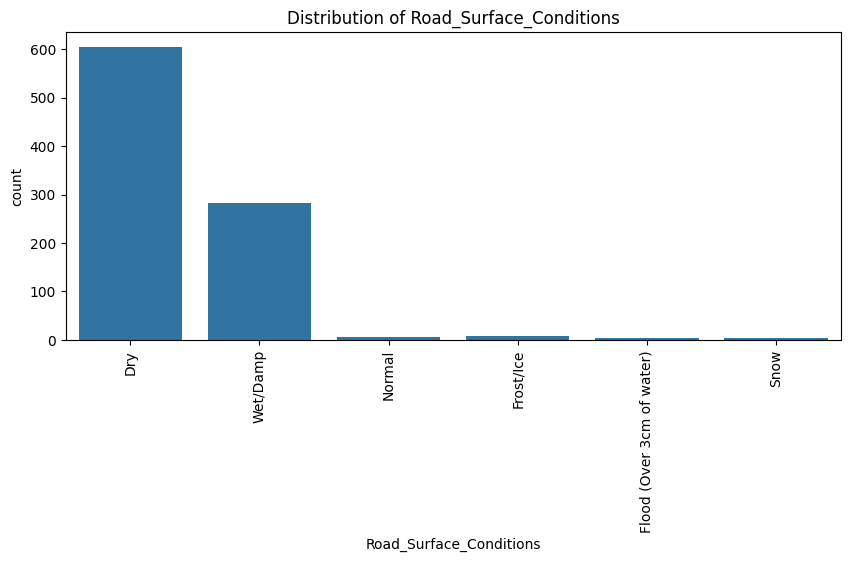

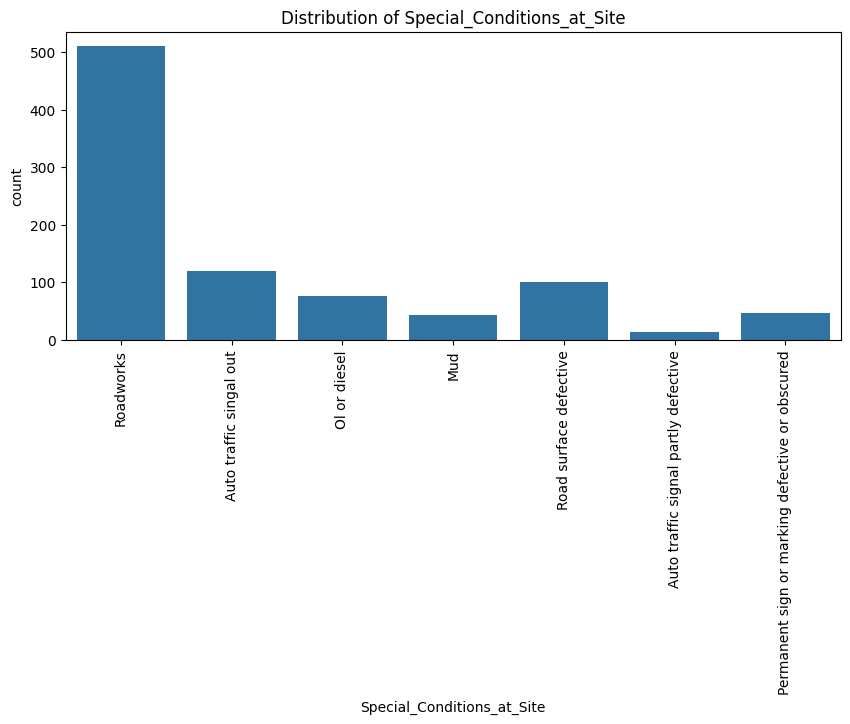

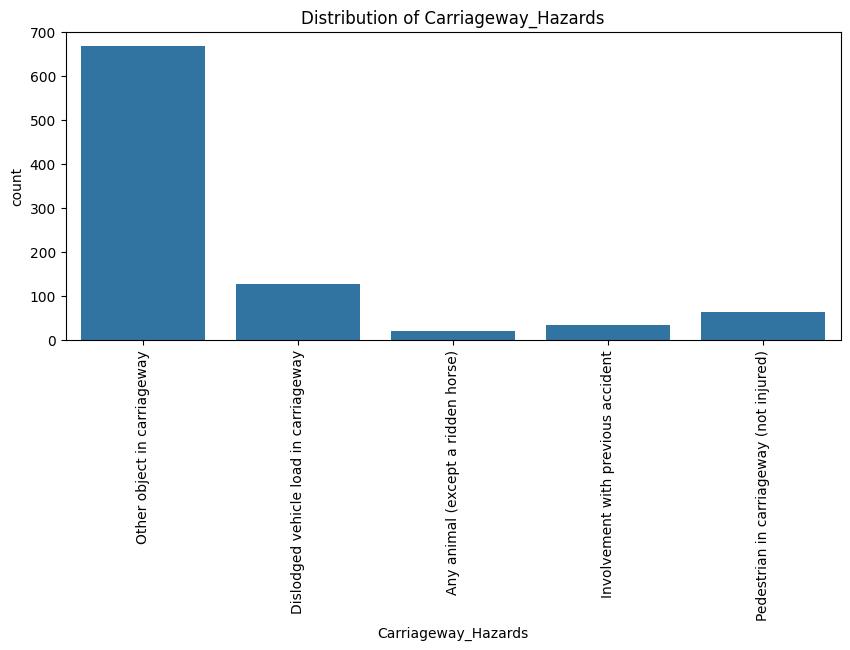

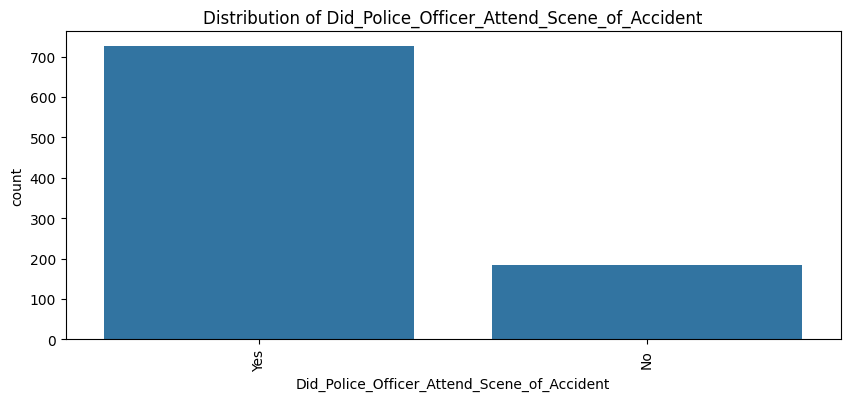

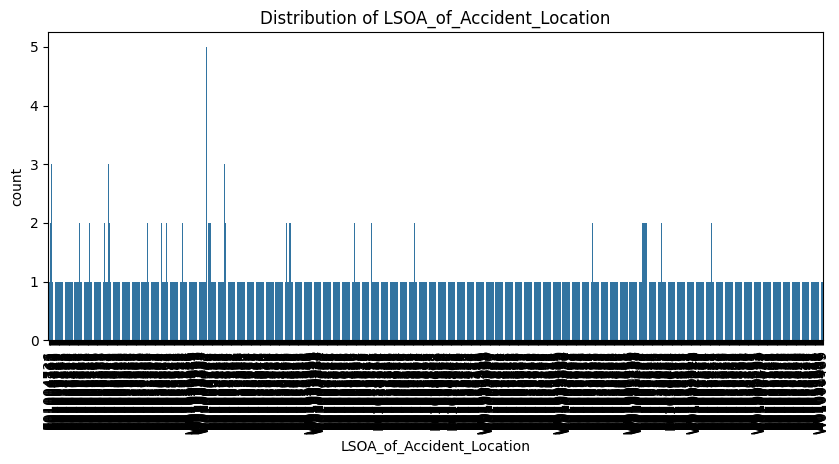

In [8]:
# Distribution of categorical features
categorical_cols = df.select_dtypes(include=['O']).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90)
    plt.show()

# Bivariate Analysis

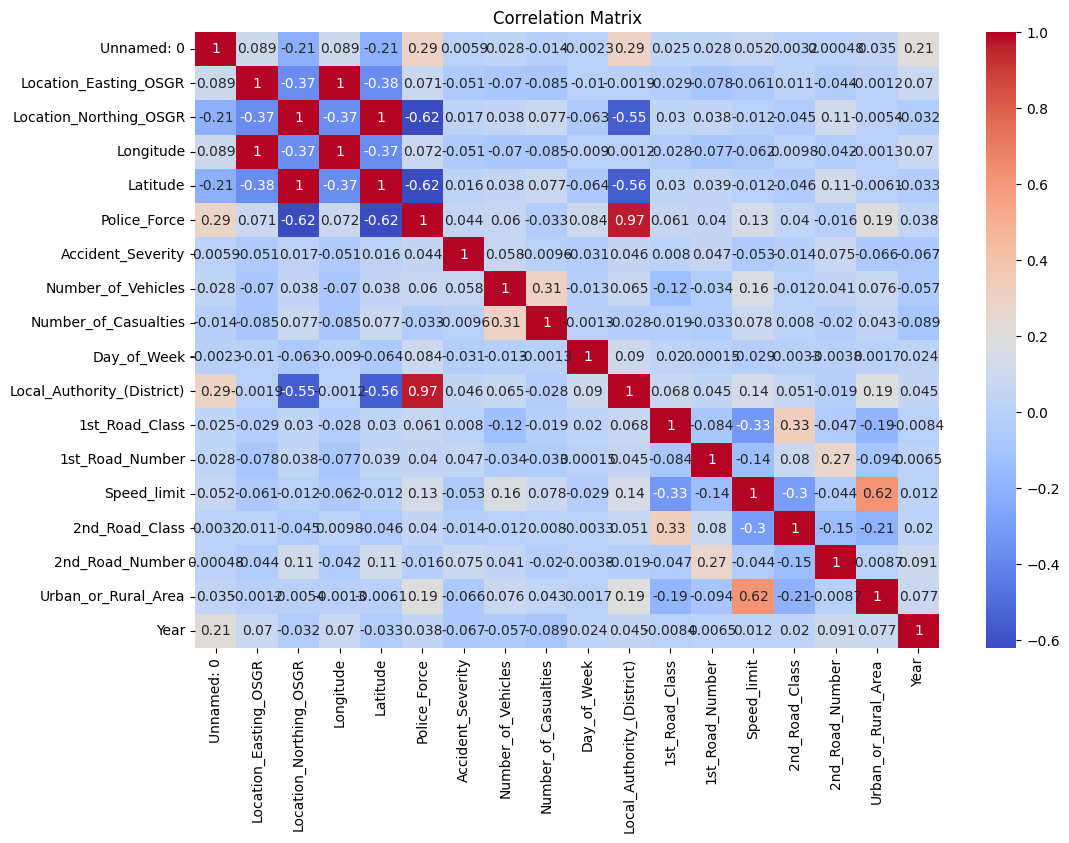

In [9]:
# 5. Bivariate Analysis
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Scatter Plotting

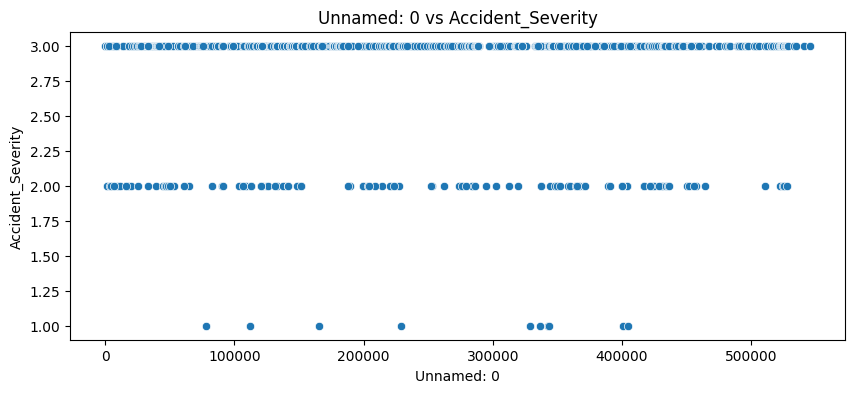

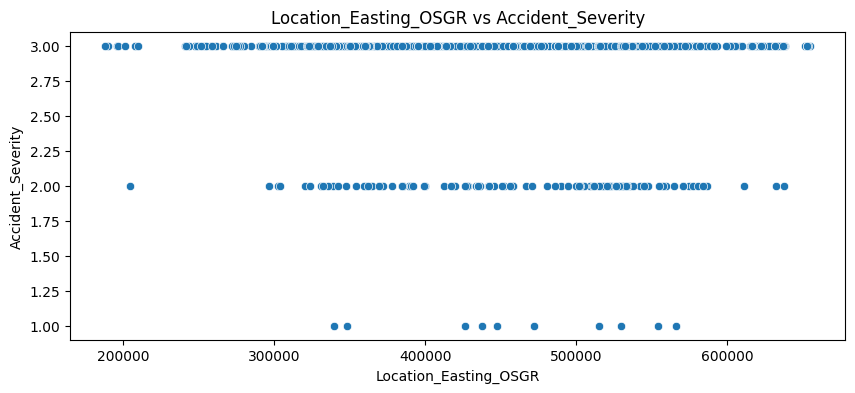

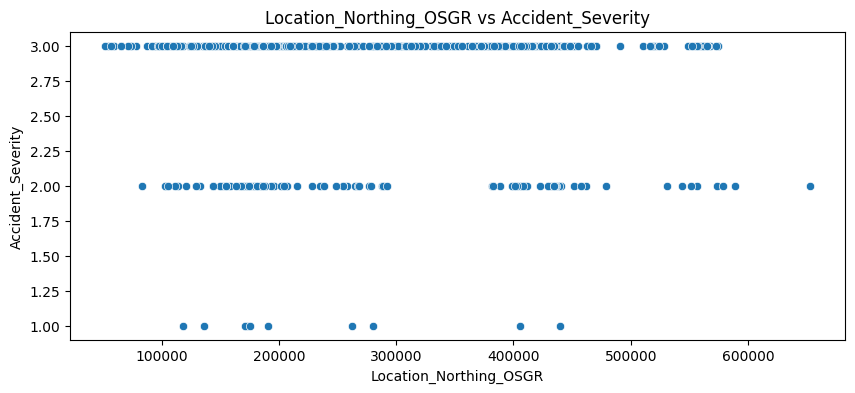

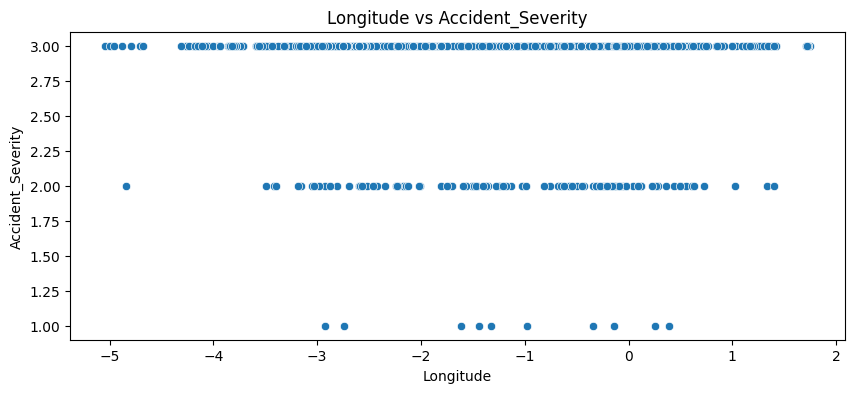

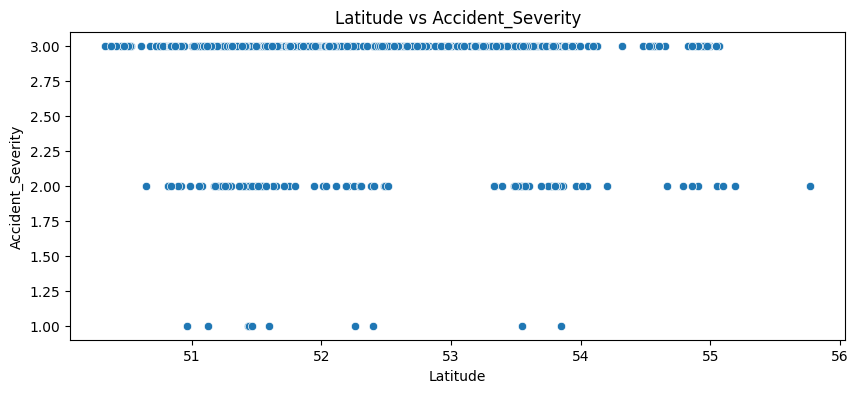

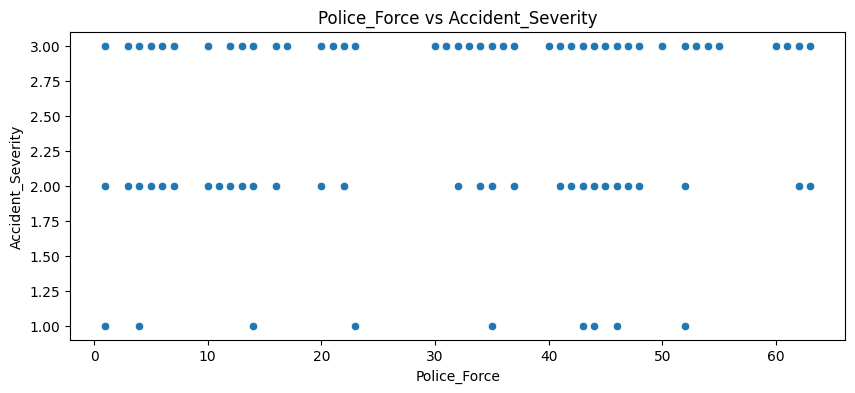

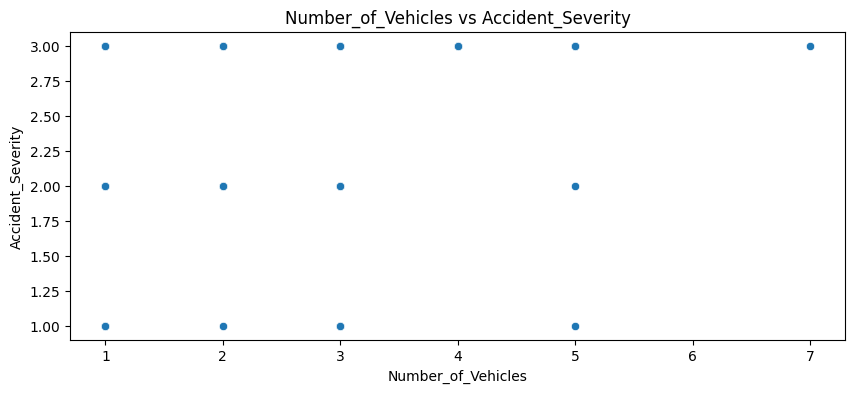

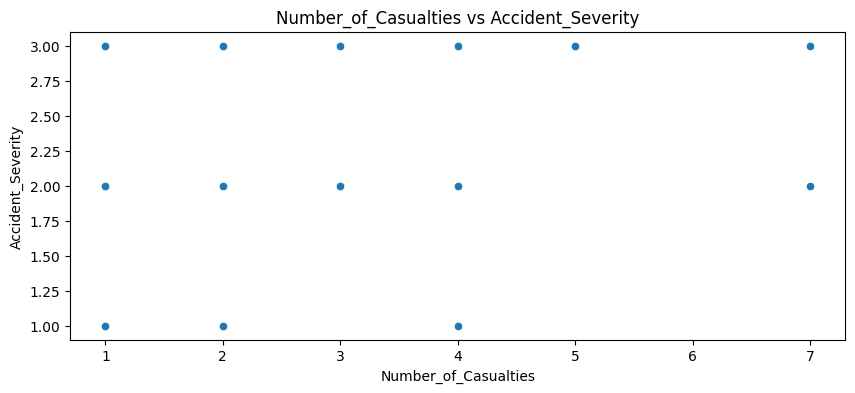

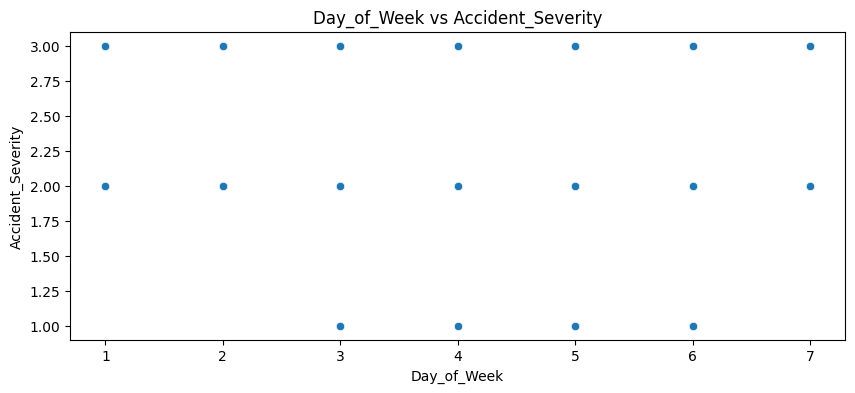

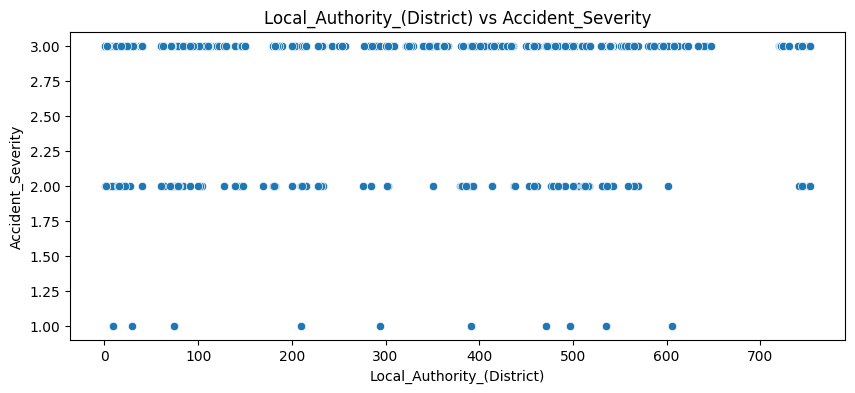

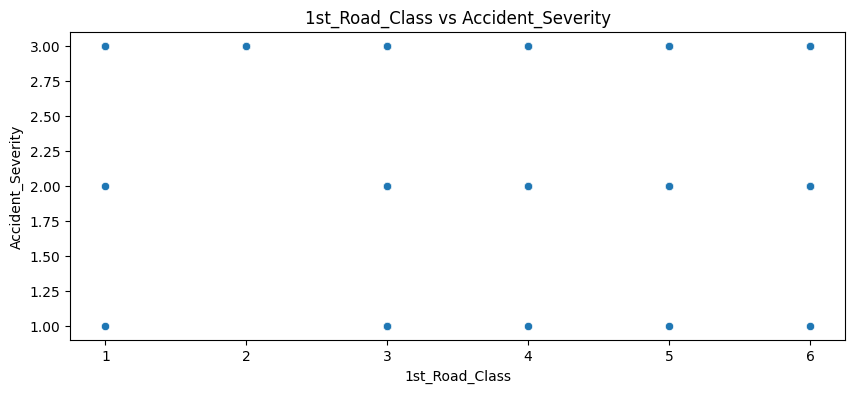

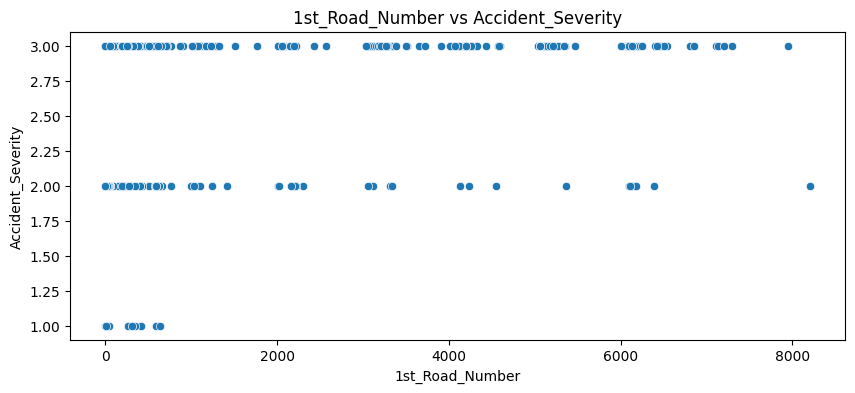

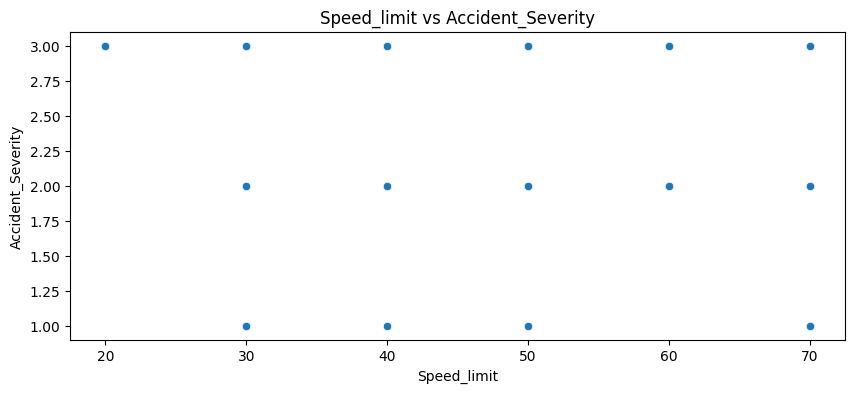

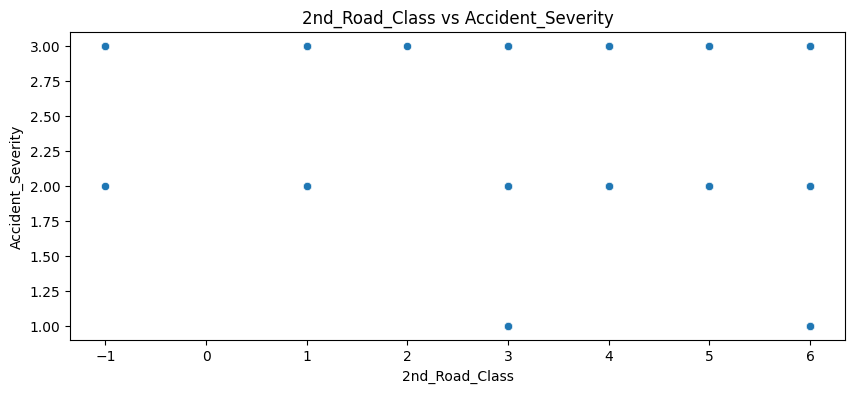

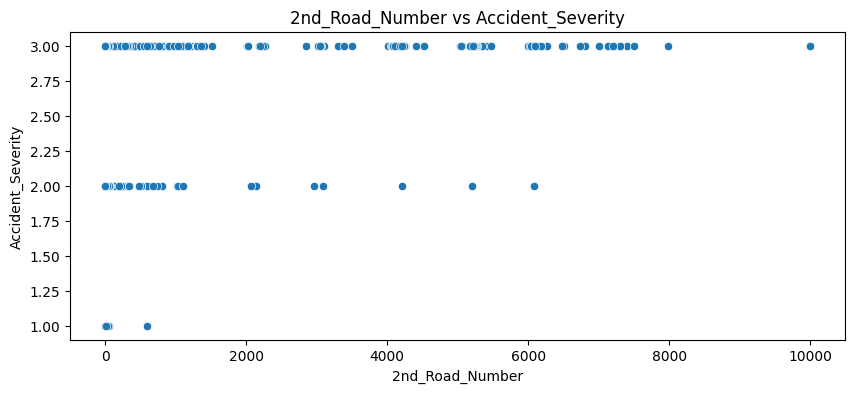

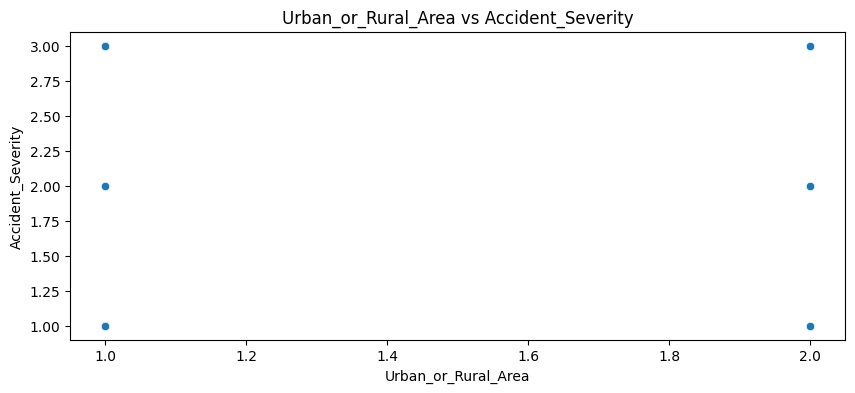

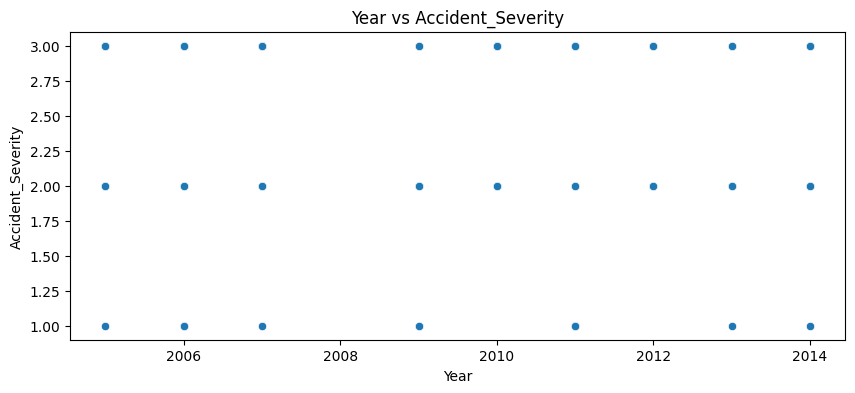

In [10]:
# Scatter plots for numerical features vs target (assuming 'Accident_Severity' is the target variable)
target = 'Accident_Severity'
for col in numeric_cols:
    if col != target:
        plt.figure(figsize=(10, 4))
        sns.scatterplot(data=df, x=col, y=target)
        plt.title(f'{col} vs {target}')
        plt.show()

# Box Plotting

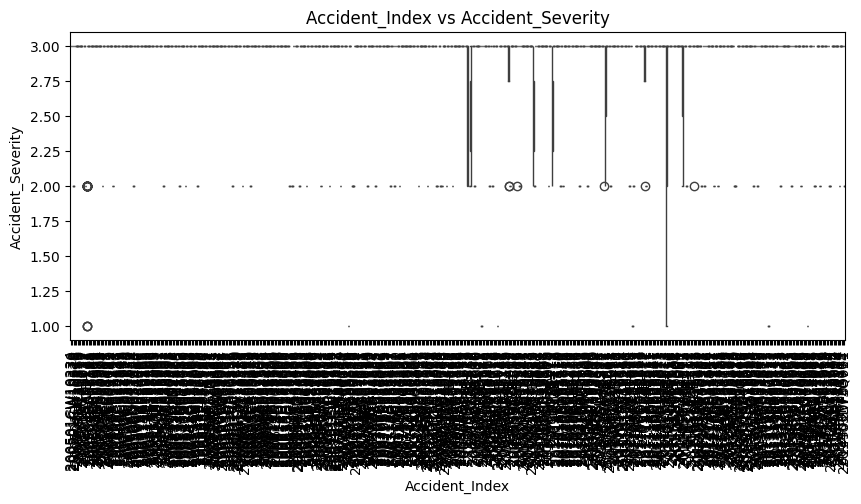

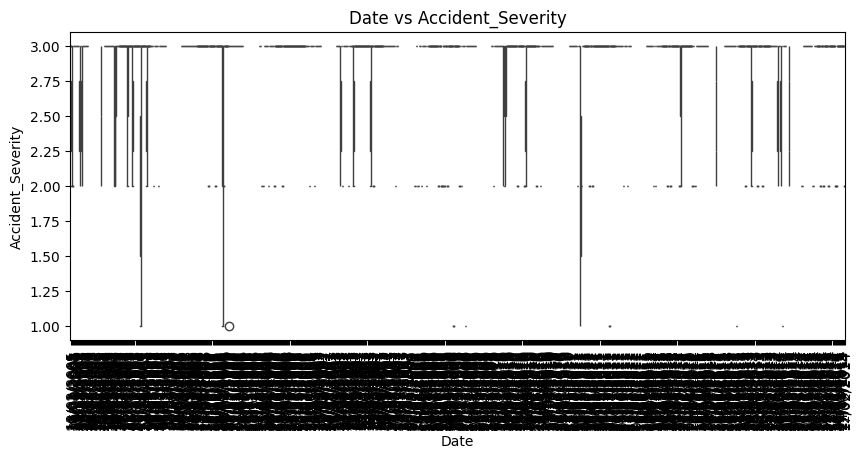

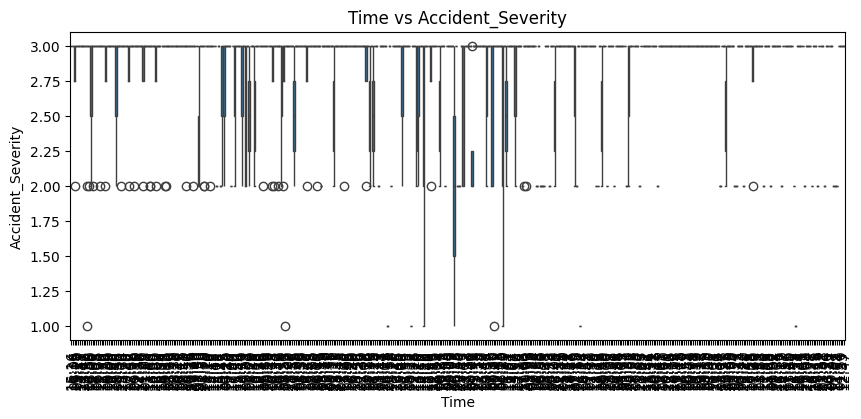

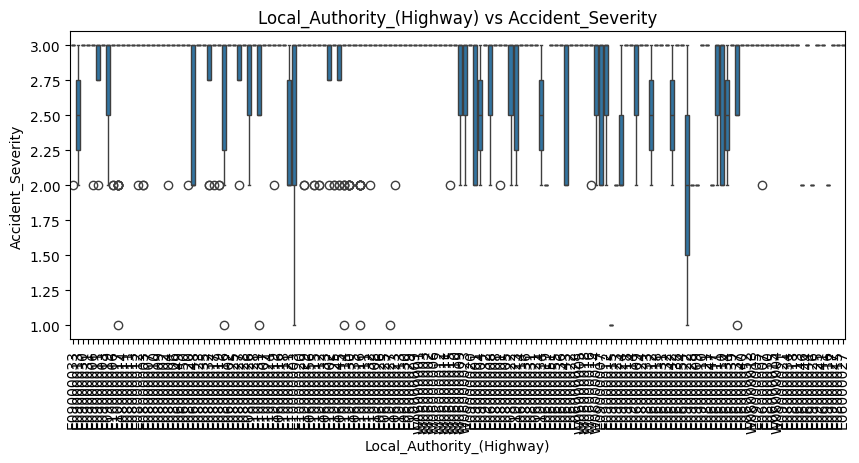

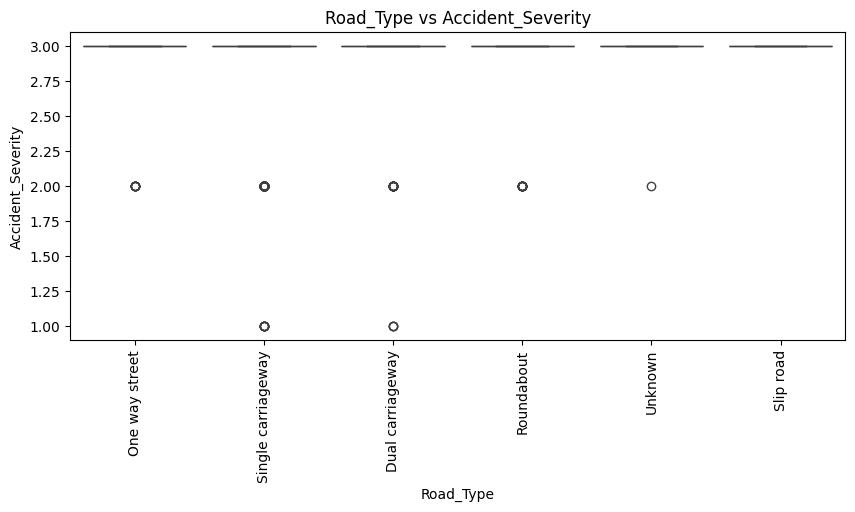

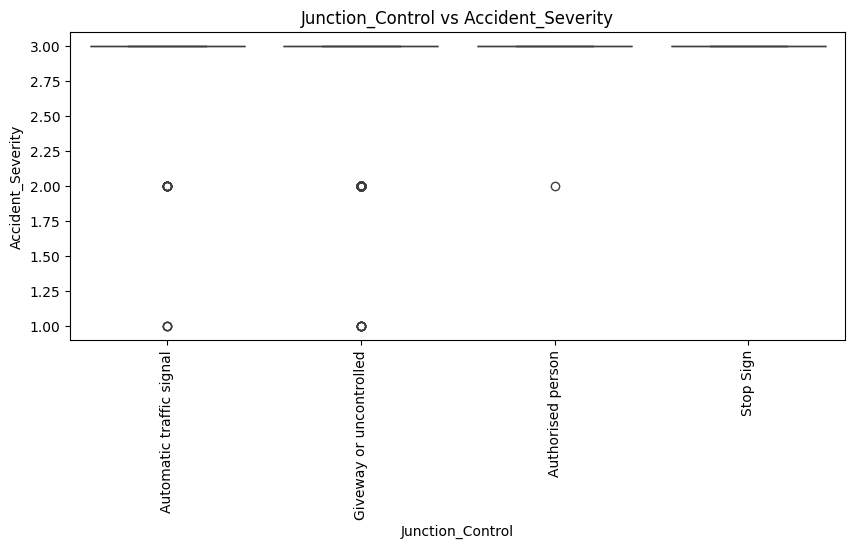

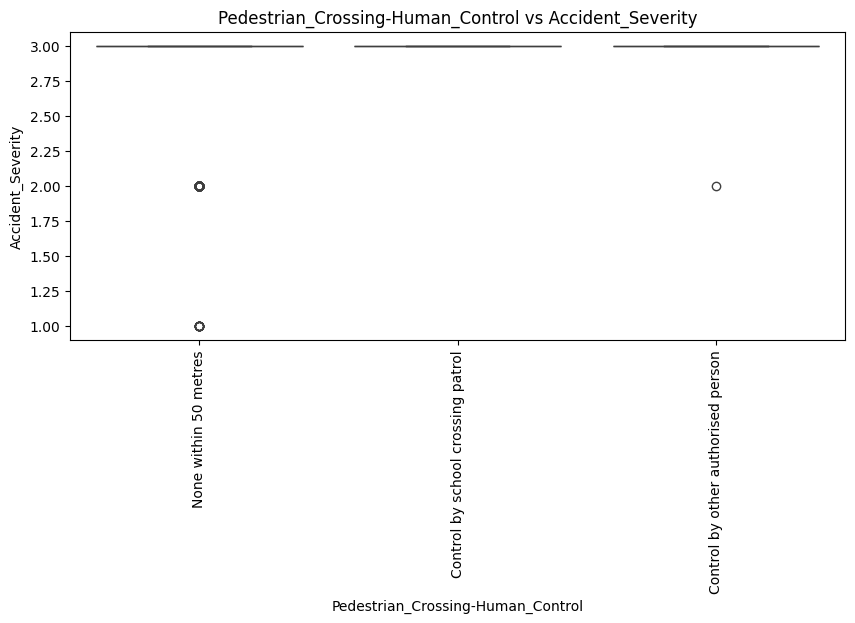

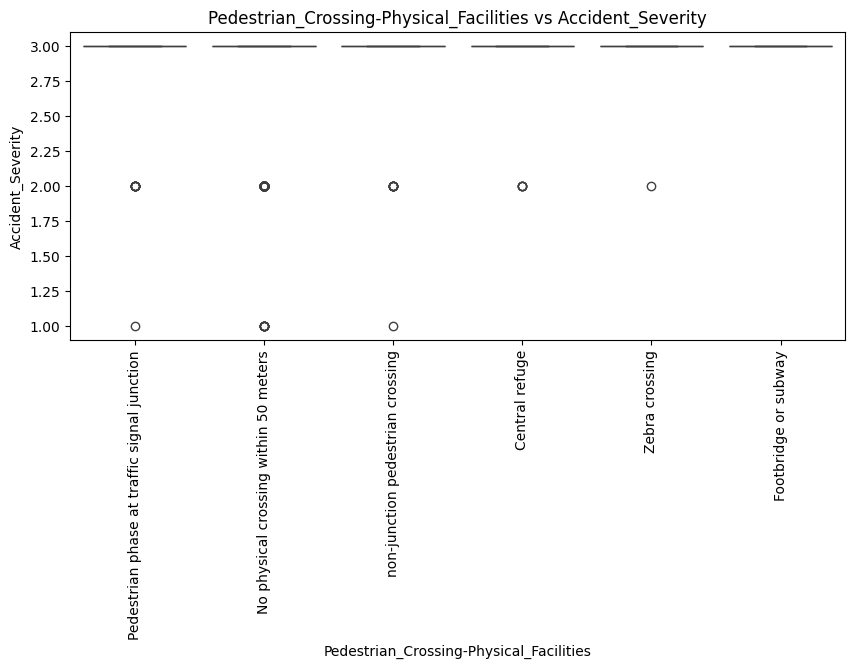

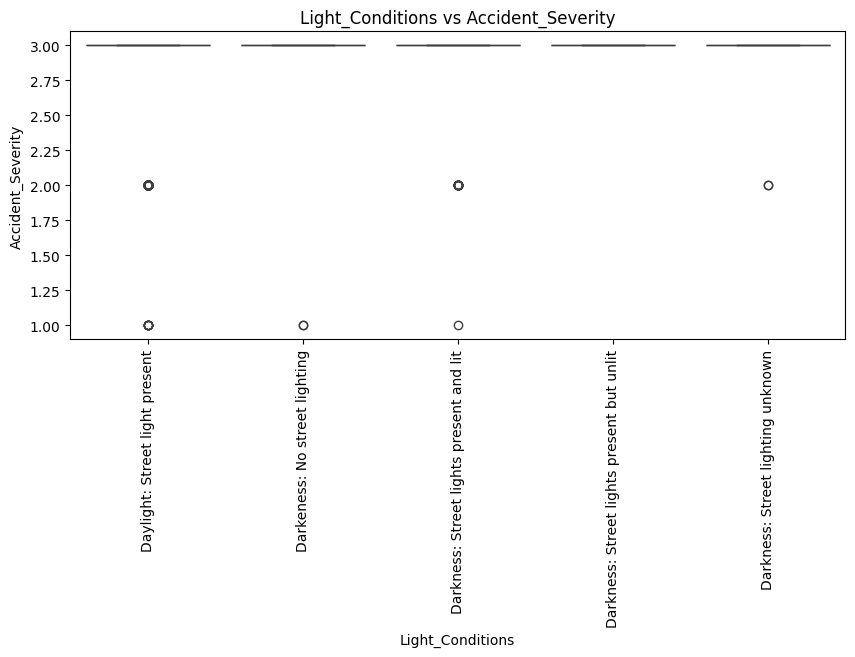

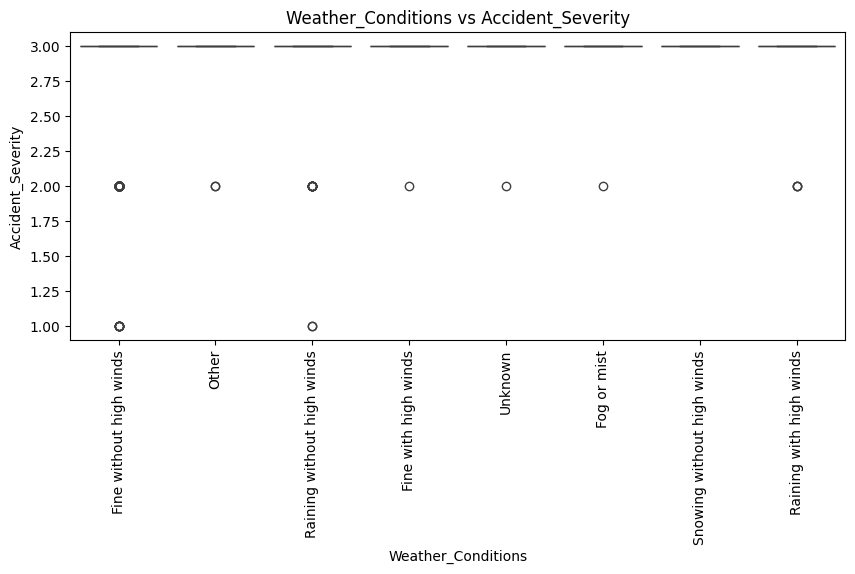

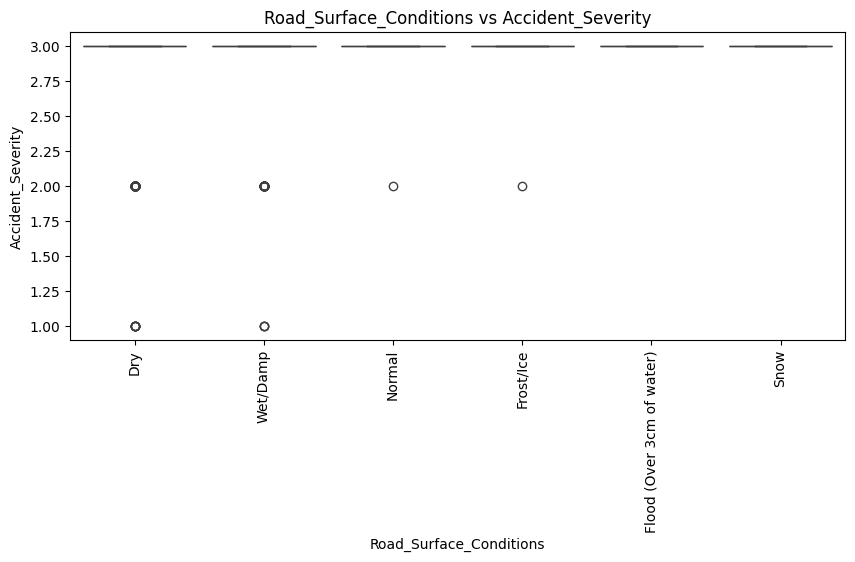

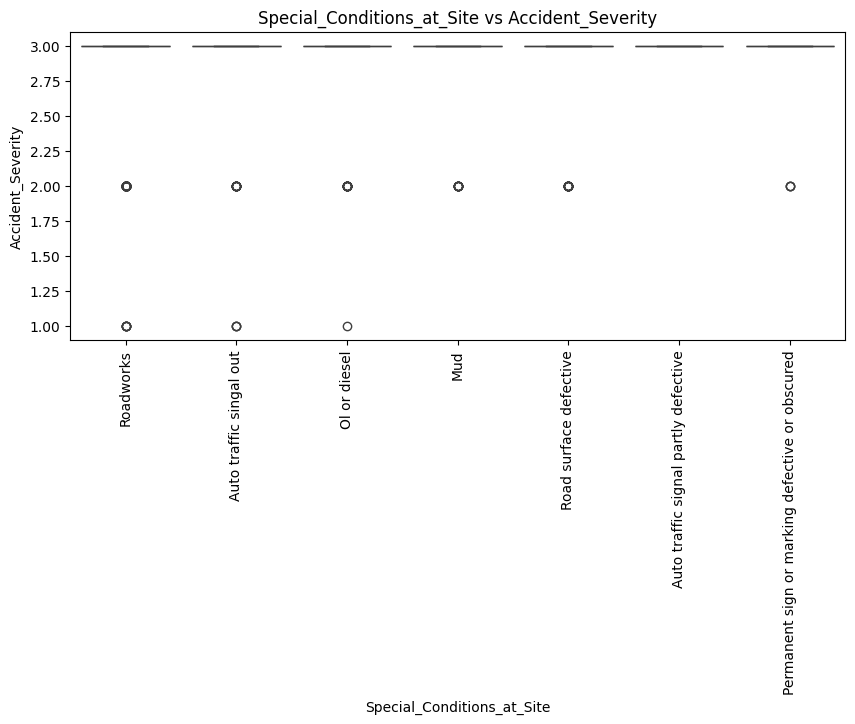

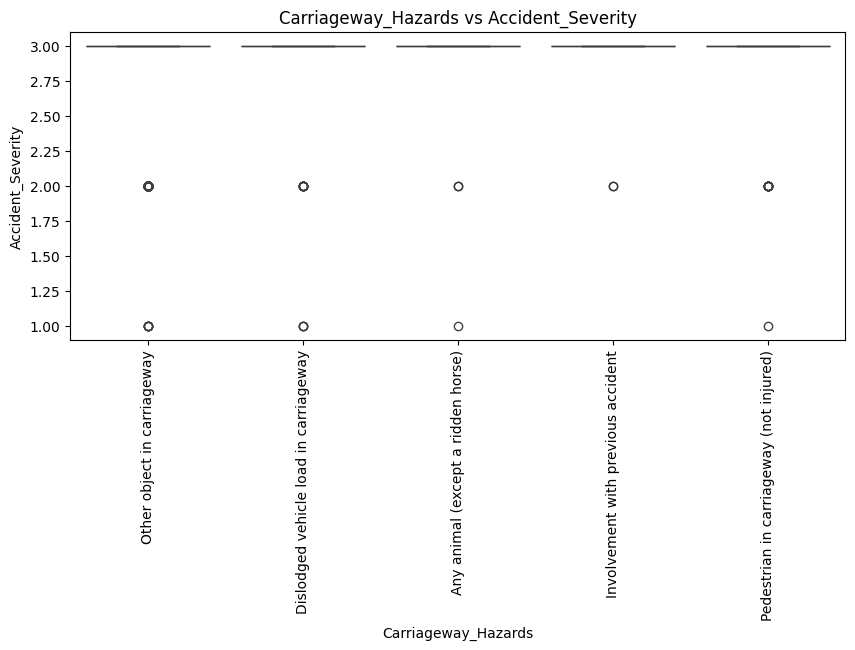

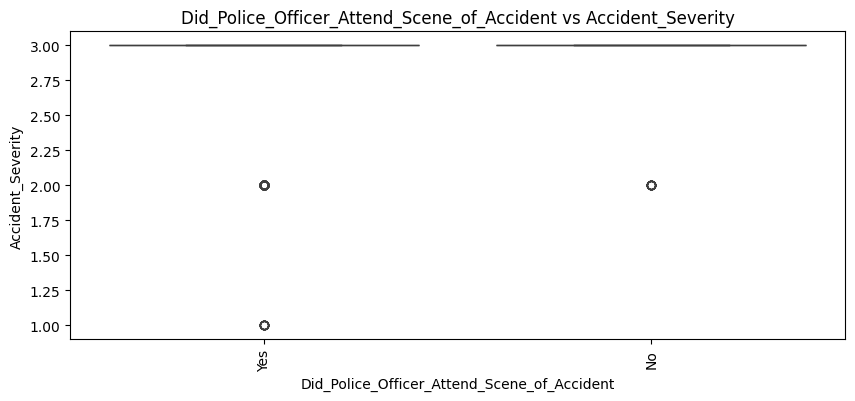

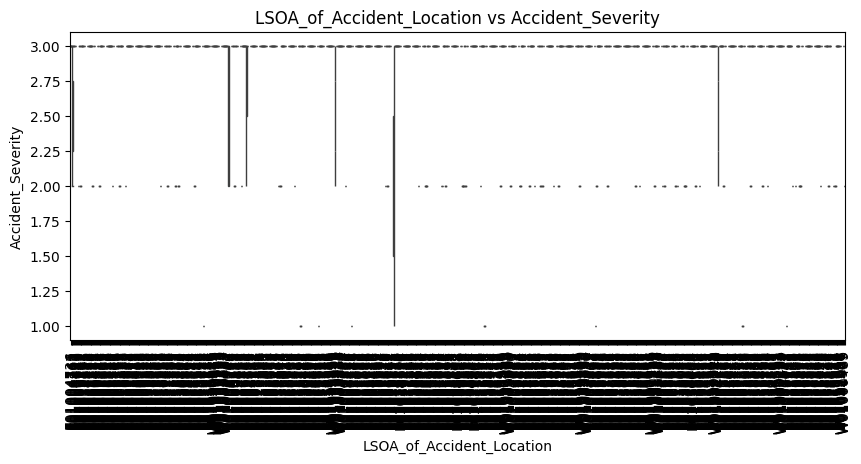

In [11]:
# Box plots for categorical features vs target
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=df, x=col, y=target)
    plt.title(f'{col} vs {target}')
    plt.xticks(rotation=90)
    plt.show()

# Visualisation

In [12]:
# Visualization
# Number of accidents per year/month/day (assuming 'Date' column is available)
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Year')
plt.title('Number of Accidents per Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month')
plt.title('Number of Accidents per Month')
plt.show()

ValueError: time data "18/03/2005" doesn't match format "%m/%d/%Y", at position 1. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.